In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customertravel.csv')

In [3]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [5]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [6]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [7]:
object_type = {'FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot'}

for i in object_type:
    print(f'{i} - {df[i].unique()}')

FrequentFlyer - ['No' 'Yes' 'No Record']
AnnualIncomeClass - ['Middle Income' 'Low Income' 'High Income']
BookedHotelOrNot - ['Yes' 'No']
AccountSyncedToSocialMedia - ['No' 'Yes']


In [8]:
len(df[ df['FrequentFlyer']=='No Record' ])

60

In [9]:
len(df[ df['FrequentFlyer']=='No' ])

608

In [10]:
len(df[ df['FrequentFlyer']=='Yes' ])

286

In [11]:
counts = df['AnnualIncomeClass'].value_counts()

<Axes: xlabel='AnnualIncomeClass'>

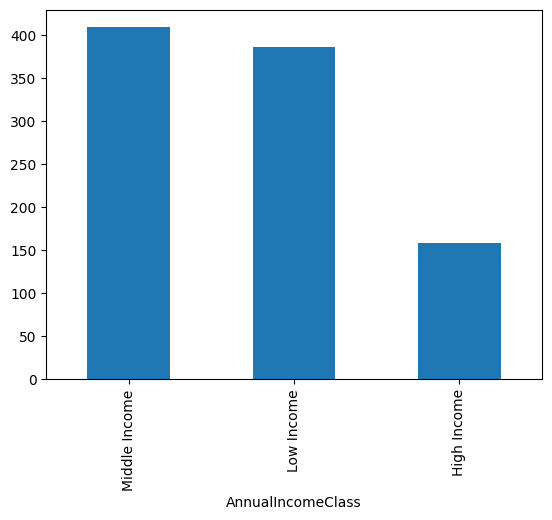

In [12]:
counts.plot(kind='bar')

In [13]:
count = df.groupby(['AnnualIncomeClass','FrequentFlyer']).size().unstack().fillna(0)
count

FrequentFlyer,No,No Record,Yes
AnnualIncomeClass,,,
High Income,0.0,0.0,159.0
Low Income,237.0,22.0,127.0
Middle Income,371.0,38.0,0.0


It indicates that, 'Middle class' are strictly non-frequent travellers
<br>'Lower class' also mostly falls into non-frequnt travellers
<br>Hence, people with label 'No Record' can be classified as 'No'

In [14]:
df['FrequentFlyer'] = df['FrequentFlyer'].replace('No Record','No')

In [15]:
df['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].map({'Yes': 1, 'No': 0})
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].map({'Yes': 1, 'No': 0})

In [17]:
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,Middle Income,6,0,1,0
1,34,1,Low Income,5,1,0,1
2,37,0,Middle Income,3,1,0,0
3,30,0,Middle Income,2,0,0,0
4,30,0,Low Income,1,0,0,0
...,...,...,...,...,...,...,...
949,31,1,Low Income,1,0,0,0
950,30,0,Middle Income,5,0,1,0
951,37,0,Middle Income,4,0,0,0
952,30,0,Low Income,1,1,1,0


In [18]:
df = pd.get_dummies(df, columns=['AnnualIncomeClass'], drop_first=True).astype(int)

In [19]:
df

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,0,6,0,1,0,0,1
1,34,1,5,1,0,1,1,0
2,37,0,3,1,0,0,0,1
3,30,0,2,0,0,0,0,1
4,30,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
949,31,1,1,0,0,0,1,0
950,30,0,5,0,1,0,0,1
951,37,0,4,0,0,0,0,1
952,30,0,1,1,1,0,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int32
 1   FrequentFlyer                    954 non-null    int32
 2   ServicesOpted                    954 non-null    int32
 3   AccountSyncedToSocialMedia       954 non-null    int32
 4   BookedHotelOrNot                 954 non-null    int32
 5   Target                           954 non-null    int32
 6   AnnualIncomeClass_Low Income     954 non-null    int32
 7   AnnualIncomeClass_Middle Income  954 non-null    int32
dtypes: int32(8)
memory usage: 29.9 KB


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,0.636364,0,6,0,1,0,0,1
1,0.636364,1,5,1,0,1,1,0
2,0.909091,0,3,1,0,0,0,1
3,0.272727,0,2,0,0,0,0,1
4,0.272727,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
949,0.363636,1,1,0,0,0,1,0
950,0.272727,0,5,0,1,0,0,1
951,0.909091,0,4,0,0,0,0,1
952,0.272727,0,1,1,1,0,1,0


In [23]:
X = df.drop('Target',axis=1)
y = df['Target']

In [24]:
X

,Age,FrequentFlyer,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,0.636364,0,6,0,1,0,1
1,0.636364,1,5,1,0,1,0
2,0.909091,0,3,1,0,0,1
3,0.272727,0,2,0,0,0,1
4,0.272727,0,1,0,0,1,0
...,...,...,...,...,...,...,...
949,0.363636,1,1,0,0,1,0
950,0.272727,0,5,0,1,0,1
951,0.909091,0,4,0,0,0,1
952,0.272727,0,1,1,1,1,0


In [25]:
y

0      0
1      1
2      0
3      0
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Target, Length: 954, dtype: int32

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape

(763, 7)

In [28]:
X_test.shape

(191, 7)

In [30]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=7 ))
model.add(Dense(1, activation='sigmoid'))

C:\Users\gurud\anaconda3\envs\NewEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [63]:
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.5919
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.5861
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.5939
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.5603
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.5487
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.5641
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.5493
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.5467
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.5848
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.5677
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.5703
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.5109
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.5496
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5429
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.4201
Epoch 81/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4245
Epoch 82/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.4190
Epoch 83/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.3831
Epoch 84/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.4324
Epoch 85/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.4032
Epoch 86/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.4247
Epoch 87/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.3992
Epoch 88/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.4229
Epoch 89/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.4448
Epoch 90/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.3911
Epoch 91/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.4172
Epoch 92/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.4186
Epoch 93/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.4249
Epoch 94/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 934u

In [64]:
values = model.predict(X_test)
values

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


array([[0.01472313],
       [0.02692786],
       [0.0649206 ],
       [0.10149224],
       [0.66534513],
       [0.08074911],
       [0.02106699],
       [0.04735364],
       [0.34400964],
       [0.80609196],
       [0.08999542],
       [0.18241769],
       [0.61906075],
       [0.37444767],
       [0.06611678],
       [0.1300226 ],
       [0.02965268],
       [0.33076274],
       [0.2531417 ],
       [0.15187371],
       [0.8249923 ],
       [0.0568127 ],
       [0.32702076],
       [0.7637509 ],
       [0.194935  ],
       [0.36526918],
       [0.12136604],
       [0.08808791],
       [0.15846205],
       [0.14339688],
       [0.10858401],
       [0.12049527],
       [0.50825584],
       [0.08074911],
       [0.05961784],
       [0.40433055],
       [0.5437306 ],
       [0.01472313],
       [0.4660538 ],
       [0.10702538],
       [0.56000817],
       [0.04474647],
       [0.03515096],
       [0.28633624],
       [0.06611678],
       [0.08074911],
       [0.06611678],
       [0.057

In [88]:
y_pred = np.where(values>0.5,1,0)

In [89]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8481675392670157

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[144,   7],
       [ 22,  18]], dtype=int64)